In [22]:
#All libraries used are called here
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import timeit

from ema_workbench import (Model, CategoricalParameter, SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, perform_experiments,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
#Here the problem formulation created by group 22 is called as the dike model, and uncertainties and levers are connected to the Workbench
dike_model, planning_steps = get_model_for_problem_formulation(6)
uncertainties = dike_model.uncertainties
levers = dike_model.levers

In [3]:
#Policies that have each rfr project active individually
rfr_policies = [Policy('rfr0', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
               Policy('rfr1', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
               Policy('rfr2', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
               Policy('rfr3', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
               Policy('rfr4', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':1,
                                      '4_RfR 1':1, 
                                      '4_RfR 2':1, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0})]

In [4]:
rfr_tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    rfr_results = evaluator.perform_experiments(scenarios=1000, policies=rfr_policies, reporting_interval=50)
rfr_toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 5 policies * 1 model(s) = 5000 experiments
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 250 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 350 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 450 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 550 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 650 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 750 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 850 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 950 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1050 cases completed
[MainProcess/INFO] 1100 cases completed
[MainProcess/INFO]

In [27]:
print('Multiprocessing time in seconds:', rfr_toc-rfr_tic)
save_results(rfr_results, 'iso_rfr.tar.gz')

Multiprocessing time in seconds: 3583.0847319


[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\iso_rfr.tar.gz


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


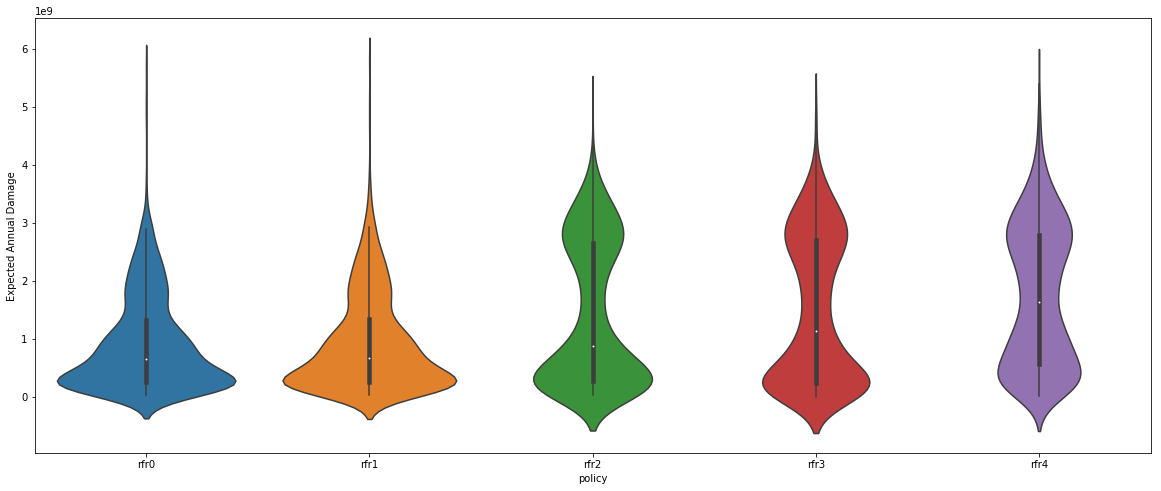

In [6]:
rfr_experiments, rfr_outcomes = rfr_results
rfr_data = pd.DataFrame(rfr_outcomes)
rfr_data['policy'] = rfr_experiments['policy']
fig, ax = plt.subplots(figsize=(20,8))
sns.violinplot(data=rfr_data, y='Expected Annual Damage', x='policy');

In [7]:
# deaths = pd.DataFrame(outcomes, columns = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
#                                          'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'])

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


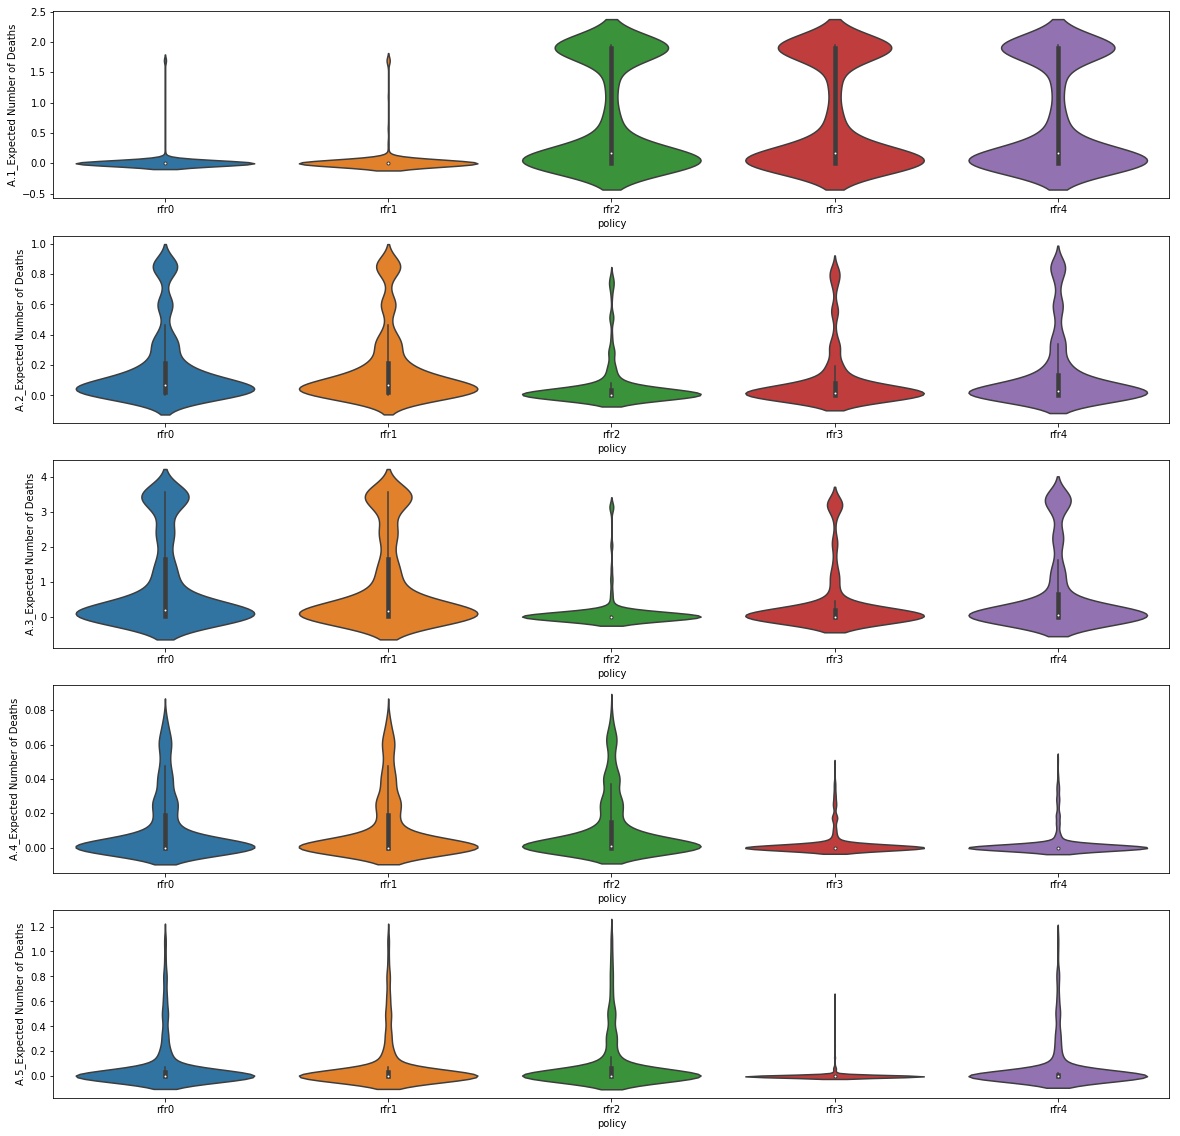

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
for i in range(1,6):
    plt.subplot(510+i)
    sns.violinplot(data=rfr_data, y='A.{}_Expected Number of Deaths'.format(i), x='policy', scale='width');

In [9]:
costs = pd.DataFrame(rfr_outcomes, columns = ['RfR Investment Costs'])
costs['policy'] = rfr_experiments['policy']
short = costs.drop_duplicates(['RfR Investment Costs', 'policy'])
short

,RfR Investment Costs,policy
0,253800000.0,rfr0
1000,653400000.0,rfr1
2000,92100000.0,rfr2
3000,363600000.0,rfr3
4000,768300000.0,rfr4


In [10]:
#Policies that have each dike project active individually
dike_policies = [Policy('dike1', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 0,
                                      'A.1_DikeIncrease 0':5, 
                                      'A.1_DikeIncrease 1':5, 
                                      'A.1_DikeIncrease 2':5,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('dike2', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':5,
                                      'A.2_DikeIncrease 1':5,
                                      'A.2_DikeIncrease 2':5,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('dike3', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':5,
                                      'A.3_DikeIncrease 1':5,
                                      'A.3_DikeIncrease 2':5,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('dike4', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':5,
                                      'A.4_DikeIncrease 1':5,
                                      'A.4_DikeIncrease 2':5,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('dike5', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':5,
                                      'A.5_DikeIncrease 1':5,
                                      'A.5_DikeIncrease 2':5})]

In [11]:
dike_tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    dike_results = evaluator.perform_experiments(scenarios=1000, policies=dike_policies, reporting_interval=50)
dike_toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 5 policies * 1 model(s) = 5000 experiments
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 250 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 350 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 450 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 550 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 650 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 750 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 850 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 950 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1050 cases completed
[MainProcess/INFO] 1100 cases completed
[MainProcess/INFO]

In [24]:
print('Multiprocessing time in seconds:', dike_toc-dike_tic)
save_results(dike_results, 'iso_dikes.tar.gz')

Multiprocessing time in seconds: 8742.8543761


[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\iso_dikes.tar.gz


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


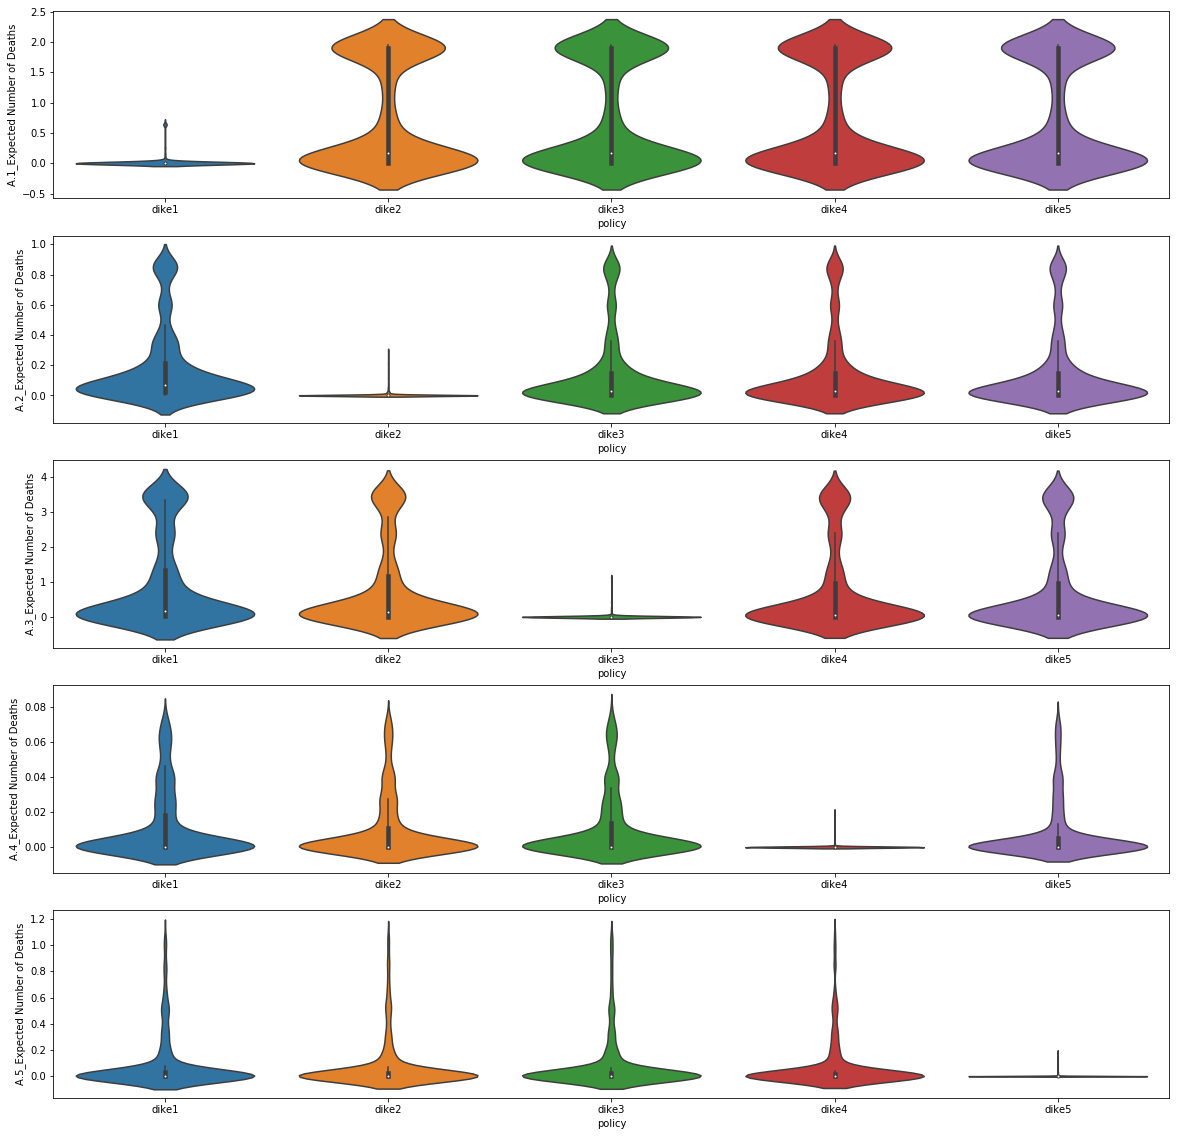

In [13]:
dike_experiments, dike_outcomes = dike_results
dike_data = pd.DataFrame(dike_outcomes)
dike_data['policy'] = dike_experiments['policy']

fig, ax = plt.subplots(figsize=(20,20))
for i in range(1,6):
    plt.subplot(510+i)
    sns.violinplot(data=dike_data, y='A.{}_Expected Number of Deaths'.format(i), x='policy', scale='width');

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


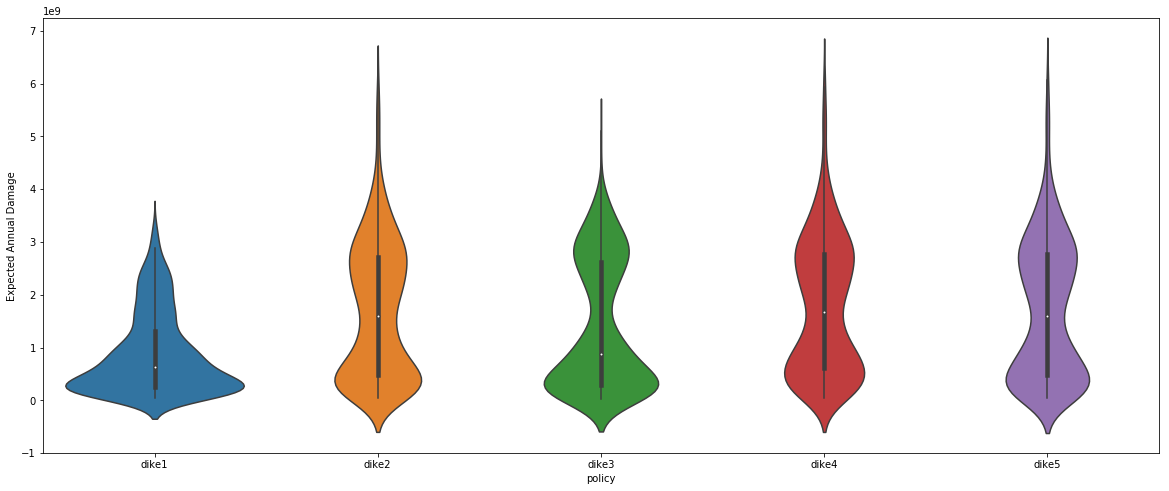

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
sns.violinplot(data=dike_data, y='Expected Annual Damage', x='policy');

In [15]:
dike_costs = pd.DataFrame(dike_outcomes, columns = ['Dike Investment Costs'])
dike_costs['policy'] = dike_experiments['policy']
dike_short = dike_costs.drop_duplicates(['Dike Investment Costs', 'policy'])
dike_short

,Dike Investment Costs,policy
0,1.933444e+08,dike1
1000,2.128234e+08,dike2
2000,1.031638e+08,dike3
3000,3.965139e+07,dike4
4000,1.313860e+08,dike5


In [16]:
#Policies that have each ews number of days active individually
ews_policies = [Policy('ews1', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 1,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('ews2', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 2,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('ews3', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 3,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('ews4', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0,
                                      'EWS_DaysToThreat': 4,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0})]

In [17]:
ews_tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    ews_results = evaluator.perform_experiments(scenarios=1000, policies=ews_policies, reporting_interval=50)
ews_toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 250 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 350 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 450 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 550 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 650 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 750 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 850 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 950 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1050 cases completed
[MainProcess/INFO] 1100 cases completed
[MainProcess/INFO]

In [26]:
print('Multiprocessing time in seconds:', ews_toc-ews_tic)
save_results(ews_results, 'iso_ews.tar.gz')

Multiprocessing time in seconds: 3005.6718817


[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\iso_ews.tar.gz


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


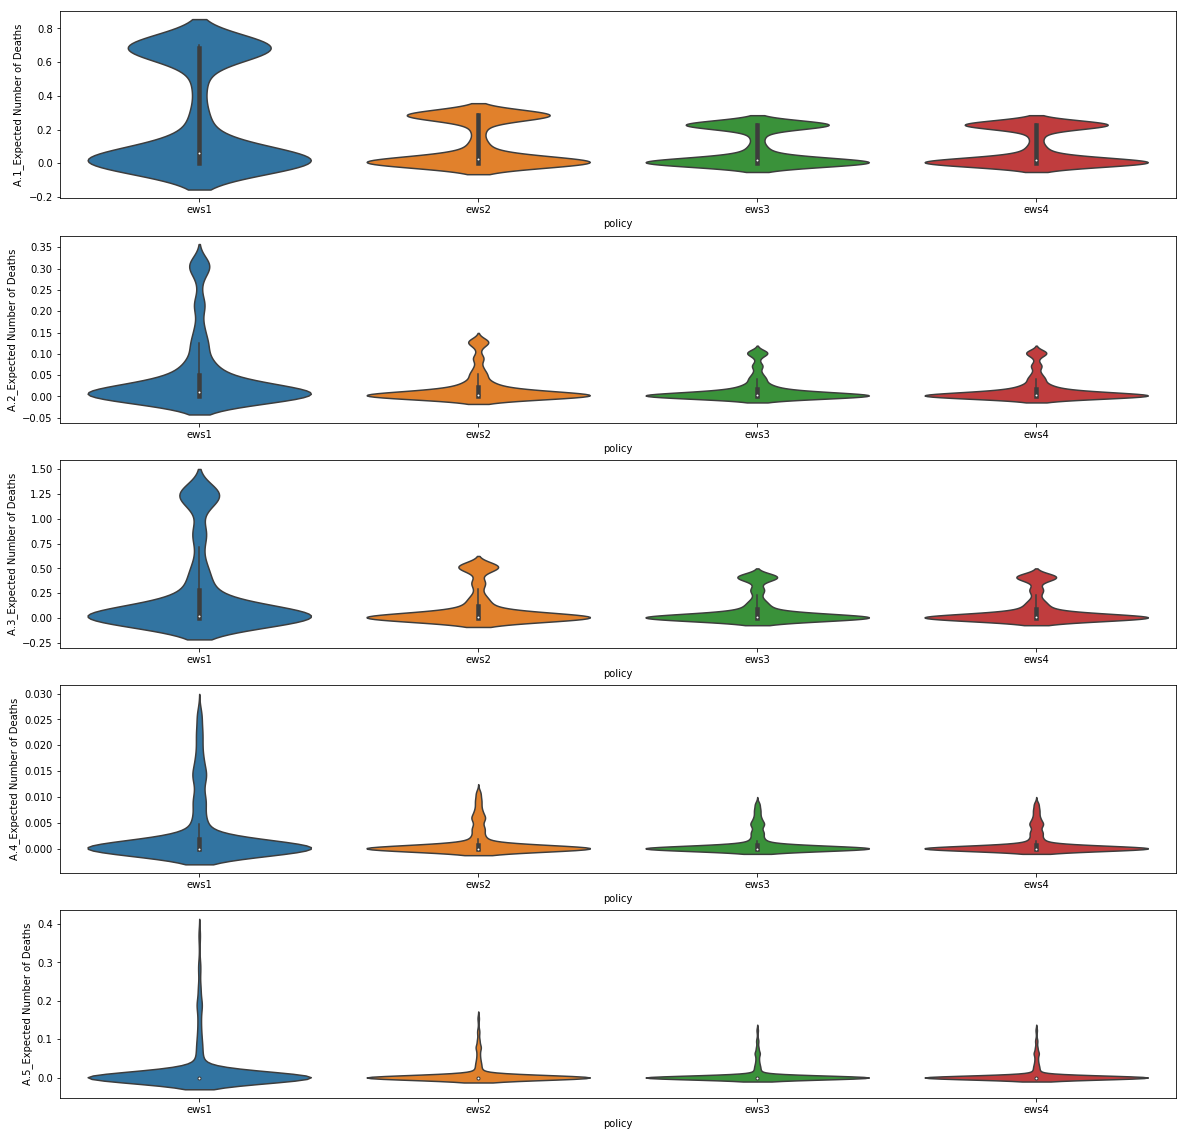

In [19]:
ews_experiments, ews_outcomes = ews_results
ews_data = pd.DataFrame(ews_outcomes)
ews_data['policy'] = ews_experiments['policy']

fig, ax = plt.subplots(figsize=(20,20))
for i in range(1,6):
    plt.subplot(510+i)
    sns.violinplot(data=ews_data, y='A.{}_Expected Number of Deaths'.format(i), x='policy', scale='width');

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


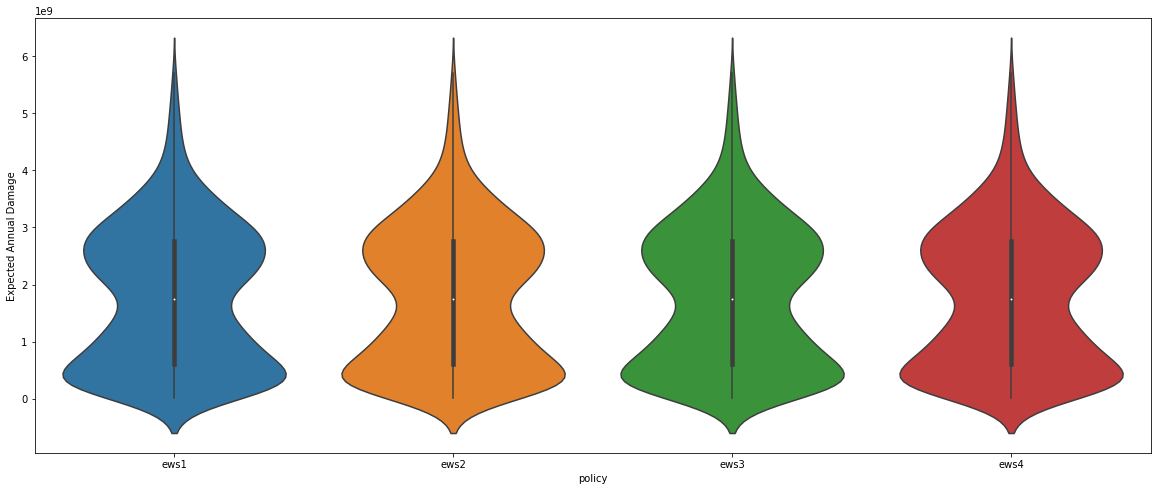

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
sns.violinplot(data=ews_data, y='Expected Annual Damage', x='policy');

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


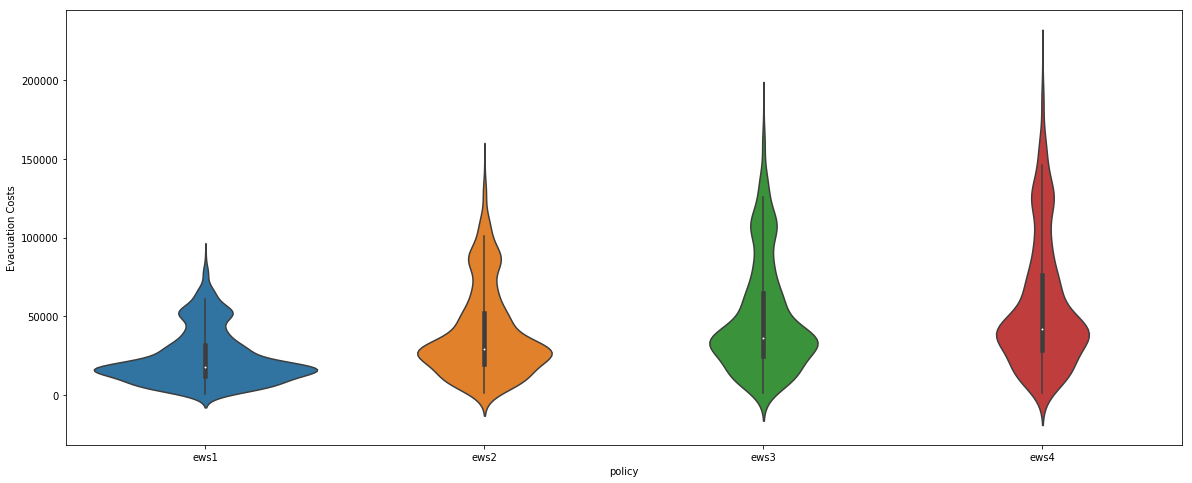

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
sns.violinplot(data=ews_data, y='Evacuation Costs', x='policy');